#Data analysis project
#The future Corona cases in Denmark

##Group: Anders & Frederik

##Introduction
We use data from John Hopkins University originating from Statens Serum Institut.  
We use a simple exponential growth model to fit the existing Corona cases in Denmark and extrapolate the model 30 days manually and automatically.
      
You can view the interactive plot here (since the Notebook-file becomes too big to upload to Github when we attempt to display the graph in-code by "fig.show()"):   
https://htmlpreview.github.io/?https://raw.githubusercontent.com/NumEconCopenhagen/projects-2020-anders-frederik/master/dataproject/Interactive%20graph.html    

The newest data can be downloaded from this Kaggle:  
https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv

We uploaded the csv-file to our Github repository the 18th of April. 

In the blocks below, we do the following data steps:   
1: Load the data and clean it for the purpose.   
2: Plot the confirmed-/ active cases, recovered and deaths over time.   
3: Calculate a recovered- and death rate and we plot the rates over time.  
4: Model the growth of total cases using scipy curve and extrapolate the growth 30 days.   
5: Create an interactive graph on the basis of the growth model.

##Conclusion   
The number of days with Corona in Denmark at the 19th of April: 52.0 days, and the number of Corona cases: 7242.0 confirmed cases. The number of cases after 30 days after, that is, the 19th of May: 31238.8 cases. That is, if the number of Corona cases continues to rise exponentially.   
This simple extrapolation is most likely to yield a biased estimate of the future number cases as the continuous growth depends on human behaviour to be similair to the behaviour already experienced since the first contraction in Denmark. Naturally, we would expect human behaviour to be different from these first few months of Corona and thus the patten of spread is to change as well. Hence, the estimated future number of cases is to be interpreted with causion.

1: Load the data and clean it for the purpose.

In [199]:
import pandas as pd
import numpy as np

#1.1 Get file from URL (our repository)
url = 'https://raw.githubusercontent.com/NumEconCopenhagen/projects-2020-anders-frederik/master/dataproject/covid_19_data.csv'
df = pd.read_csv(url, index_col=1)

#1.2 Renaming columns for the next data step
df = df.rename(columns = {"Country/Region" : "Country" , "Province/State" : "Province"})

#1.3 Keeping only Denmark while removing the provinces: Faroe Islands and Greenland
df = df[df.Country == "Denmark"]
df = df[df.Province != "Faroe Islands"]
df = df[df.Province != "Greenland"]

#1.4 Dropping unnecessary columns: "SNo", "Province", "Country" and "Last Update"
drop_cols = [0,1,2,3]
df.drop(df.columns[drop_cols], axis=1, inplace=True)

#1.5 Printing the DataFrame
df

,Confirmed,Deaths,Recovered
ObservationDate,,,
02/27/2020,1.0,0.0,0.0
02/28/2020,1.0,0.0,0.0
02/29/2020,3.0,0.0,0.0
03/01/2020,4.0,0.0,0.0
03/02/2020,4.0,0.0,0.0
03/03/2020,6.0,0.0,0.0
03/04/2020,10.0,0.0,0.0
03/05/2020,10.0,0.0,0.0
03/06/2020,23.0,0.0,1.0


2: Plot the confirmed-/ active cases, recovered and deaths over time.

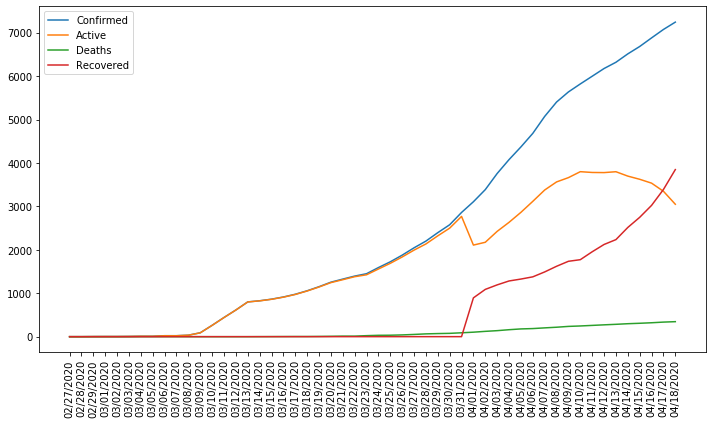

In [158]:
#2.1 Defining active cases as the column "Active"
df["Active"] = df["Confirmed"] - df["Deaths"] - df["Recovered"]

#2.2 Plotting the confirmed- and active cases plus the deaths and recovered in Denmark.
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(10,6)).add_subplot(111)

ax.plot(df["Confirmed"], label = "Confirmed")
ax.plot(df["Active"], label = "Active")
ax.plot(df["Deaths"], label = "Deaths")
ax.plot(df["Recovered"], label = "Recovered")

plt.xticks(rotation='90')

plt.tight_layout()
ax.legend()
plt.show()

The number of active cases has been steadily climbing until recently when recovered cases started emerging in the data.

3: Calculate a recovered- and death rate and we plot the rates over time.   


We define and plot the recovered- and the death ratio in Denmark over time.   
The death rate is equivalent to asking the question:   
"What are the chances of dying from Corona virus?"  
And opposite with the recovered rate:   
"What are the chances of surviving the Corona virus?"

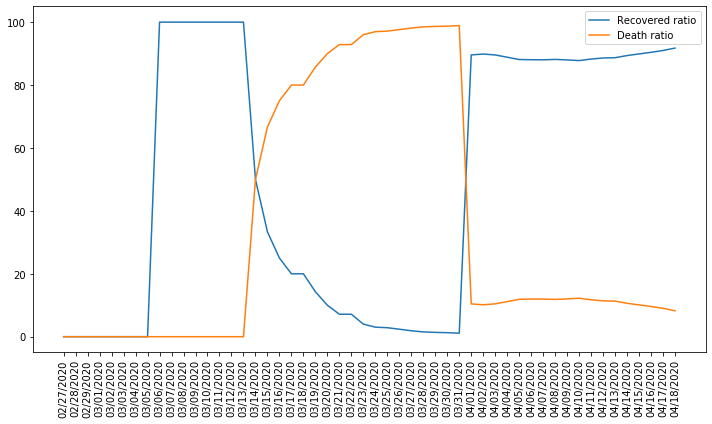

,Confirmed,Deaths,Recovered,Active,Discharged,Recovered_ratio,Death_ratio
ObservationDate,,,,,,,
02/27/2020,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000
02/28/2020,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000
02/29/2020,3.0,0.0,0.0,3.0,0.0,0.000000,0.000000
03/01/2020,4.0,0.0,0.0,4.0,0.0,0.000000,0.000000
03/02/2020,4.0,0.0,0.0,4.0,0.0,0.000000,0.000000
03/03/2020,6.0,0.0,0.0,6.0,0.0,0.000000,0.000000
03/04/2020,10.0,0.0,0.0,10.0,0.0,0.000000,0.000000
03/05/2020,10.0,0.0,0.0,10.0,0.0,0.000000,0.000000
03/06/2020,23.0,0.0,1.0,22.0,1.0,100.000000,0.000000


In [159]:
#3.1 Defining ended cases as "Discharged"
df["Discharged"] = df["Confirmed"] - df["Active"]
df["Recovered_ratio"] = df["Recovered"] * 100 / df["Discharged"]
df["Recovered_ratio"].fillna(0, inplace = True)

df["Death_ratio"] = df["Deaths"] * 100 / df["Discharged"]
df["Death_ratio"].fillna(0, inplace = True)


#3.2 Plotting the recovered- and death ratio over time
ax = plt.figure(figsize=(10,6)).add_subplot(111)

ax.plot(df["Recovered_ratio"], label = "Recovered ratio")
ax.plot(df["Death_ratio"], label = "Death ratio")


plt.xticks(rotation='90')

plt.tight_layout()
ax.legend()
plt.show()

df

The recovered rate was 100% in a time interval at the beginning of March when only one person was recovered and none dead. The 13th of March we observe the first death and the death rate quickly climbs to 99% as per the 31th of March since still only one person was registered as recovered.  
The 1st of April there was a surge of registered recovered cases causing the death rate to plummet to 10% as the recovered rate shoots up to 90%. The death- and recovered rate have flattended throughout April. 

4: Model the growth of total cases using scipy curve and extrapolate the growth 30 days.


We use the exponential growth function, $f(x)=a\cdot e^{b\cdot x + c}+d$, to fit the confirmed cases with scipy curve_fit. Scipy.optimize.curve_fit uses a non-linaer least squares to fit a function to data.   
The program finds the minimized distances from all points of the dataset. This is done by finding the best-fit parameters for $a$, $b$, $c$ and $d$ in $f(x)$ such that the sum of squared errors are minimized.

Printing the optimized parameters, that is, popt=[a,b,c,d], given data in new line
[ 3.48208713e+00  3.99057718e-02 -1.61866632e+03  5.88002932e+00]


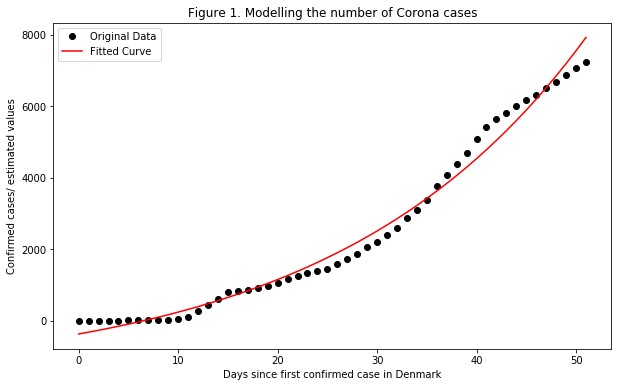

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#3.1 Defining functional form for the growth of the confirmed cases
def growth_func(x, a, b, c, d):
  return a * np.exp(b * x + d) + c

#3.2 Defining variable Y: Confirmed cases
Y = df.Confirmed.values
#3.3 Defining variable X: Number of days from length of Y (Total days of Corona virus)
X = np.arange(0, len(Y))
#3.4 Using scipy.optimize.curve_fit to define best-fit parameters for a, b and c so that the sum of squared errors are minimized
popt, pcov = curve_fit(growth_func, X, Y)
#3.5 Defining the growth function with the optimal parameters. 
      #The star in *popt unpacks the popt array so the two optimized parameter values become the second and third arguments to the function.
def growth(x):
    return growth_func(x, *popt)
print(f'Printing the optimized parameters, that is, popt=[a,b,c,d], given data in new line')
print(popt)
#3.6 Plotting the confirmed cases and the fitted values with days since first confirmed case on the first axis.
plt.figure(figsize=(10,6))
plt.plot(X, Y, 'ko', label="Original Data")
plt.plot(X, growth(X), 'r-', label="Fitted Curve")
plt.legend()
plt.title("Figure 1. Modelling the number of Corona cases")
plt.xlabel("Days since first confirmed case in Denmark")
plt.ylabel("Confirmed cases/ estimated values")
plt.show()
#3.7 Inserting the estimated values into the DataFrame for comparison
if "estimated" in df.columns:
    df.drop("estimated", axis=1, inplace=True)
x = np.arange(0, len(df))
df.insert(loc=len(df.columns),
          column="estimated",
          value=growth(x).astype(np.int))
#df

We see how the estimated values somewhat fit the data using the optimized parameters. 

We add the fitted values to the DataFrame while further extending the estimated observations in the DataFrame with 30 days to observe the number of Corona cases the 19th of May.

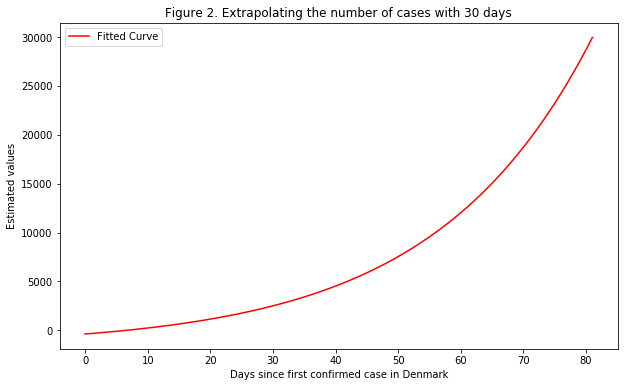

Number of days with Corona in Denmark at the 18th of April: 52.0 days, and the number of Corona cases: 7242.0 confirmed cases.
The number of cases after 30 days after, that is, the 18th of May: 31238.8 cases.


In [201]:
#3.8 Extrapolating the estimated number of cases by 30 days
plt.figure(figsize=(10,6))
X = np.arange(0, len(df)+30) #Simply adding 30 days will do the trick
plt.plot(X, 
         growth_func(X, *popt), 
         'r-', 
         label="Fitted Curve")
plt.legend()
plt.title("Figure 2. Extrapolating the number of cases with 30 days")
plt.xlabel("Days since first confirmed case in Denmark")
plt.ylabel("Estimated values")
plt.show()
print(f'Number of days with Corona in Denmark at the 18th of April: {len(df):.1f} days, and the number of Corona cases: {df["Confirmed"][-1]:.1f} confirmed cases.')
print(f'The number of cases after 30 days after, that is, the 18th of May: {growth(len(df)+30):.1f} cases.')

5: Create an interactive graph on the basis of the growth model.We define active cases as confirmed cases minus deaths and recovered.    


We use "Sliders" from the package "Plotly" to make the number of days interactive.   

In [198]:
import plotly.graph_objs as go
import numpy as np

#4.1 Creating figure
fig = go.Figure()

#4.2 Adding traces, one for each slider step
for step in np.arange(0, len(df)):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#09CED3", width=3),
            name= str(step),
            x=np.arange(0, len(df)+step, 0.01),
            y=growth_func(np.arange(0, len(df)+step, 0.01),*popt)))
    
#4.3 Making 10th trace visible
fig.data[10].visible = True

#4.4 Creating and adding slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
    )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Days: "},
    pad={"t": 50},
    steps=steps
)]

#4.5 Adding layout
fig.update_layout(
    sliders=sliders,
    title="Figure 3. Interactive graph of estimated Corona cases in Denmark",
    yaxis_title="Estimated Corona cases",
    xaxis_title="Days",
        font=dict(
        family="Palatino Linotype",
        size=13,
        color="#000000",
    
))

#4.6 You can either see the interactive graph from the url above or by copying the code into Jupyterlab and letting it upload it to your document folder using:
fig.write_html("Documents/Interactive graph.html") 


##Comment to interactive plot:   
Each step represent a day in the function, growth_func, with the optimized parameters.   
E.g. when Days: step-0, we have a figure similair to Figure 1 (intrapolation),   
     when Days: step-1,..., step-51, we can expand the growth function with 1,..., 51 days by using the slider (extrapolation).